In [ ]:
%cd /content/drive/MyDrive/Algoritmos

/content/drive/MyDrive/Algoritmos


In [26]:
# Imports

import time
import scipy.io as sio
import matplotlib.pyplot as plt

In [ ]:
# Functions

def load_octave_arr(f_name):
  A_l = sio.mmread(f_name)
  return A_l

In [ ]:
# RCM Geeks for Geeks

from collections import deque as Queue
 
globalDegree = []

def findIndex(a, x):
    for i in range(len(a)):
        if a[i][0] == x:
            #print(f'A: {a[i][0]} i: {i}')
            return i
    return -1

class ReorderingSSM:
    __matrix = []
    # Constructor and Destructor
    def __init__(self, m):
        self.__matrix = m

    # class methods
 
    # Function to generate degree of all the nodes
    def degreeGenerator(self):
 
        degrees = []
 
        for i in range(len(self.__matrix)):
            count = 0
            for j in range(len(self.__matrix[0])):
                count += self.__matrix[i][j]
 
            degrees.append(count)
 
        return degrees
 
    # Implementation of Cuthill-Mckee algorithm
    def CuthillMckee(self):
        global globalDegree
        degrees = self.degreeGenerator()
        print(f"Degrees: {degrees}")
 
        globalDegree = degrees
 
        Q = Queue()
        R = []
        notVisited = []
 
        for i in range(len(degrees)):
            notVisited.append((i, degrees[i]))
 
        # Vector notVisited helps in running BFS
        # even when there are dijoind graphs
        while len(notVisited):
 
            minNodeIndex = 0
 
            for i in range(len(notVisited)):
                if notVisited[i][1] < notVisited[minNodeIndex][1]:
                    minNodeIndex = i
            
            Q.append(notVisited[minNodeIndex][0])
            value = notVisited[Q[0]][0]
            notVisited.pop(findIndex(notVisited, value))
 
            # Simple BFS
            while Q:
 
                toSort = []
 
                for i in range(len(self.__matrix[0])):
                    if (
                        i != Q[0]
                        and self.__matrix[Q[0]][i] == 1
                        and findIndex(notVisited, i) != -1
                    ):
                        toSort.append(i)
                        notVisited.pop(findIndex(notVisited, i))
 
                toSort.sort(key=lambda x: globalDegree[x])
 
                for i in range(len(toSort)):
                    Q.append(toSort[i])
 
                R.append(Q[0])
                Q.popleft()
 
        return R
 
    # Implementation of reverse Cuthill-Mckee algorithm
    def ReverseCuthillMckee(self):
 
        cuthill = self.CuthillMckee()
 
        n = len(cuthill)
 
        if n % 2 == 0:
            n -= 1
 
        n = n // 2

        for i in range(n + 1):
            j = cuthill[len(cuthill) - 1 - i]
            cuthill[len(cuthill) - 1 - i] = cuthill[i]
            cuthill[i] = j

        return cuthill

In [22]:
# Implementation: https://github.com/ReetBarik/Reverse-Cuthill-McKee

import networkx as nx

def my_reverse_cuthill_mckee(G):

    nx.set_node_attributes(G, False, "visited")
    nx.set_node_attributes(G, dict(G.degree), "degree")


    reorder = []

    for component in list(nx.connected_components(G)):
    
        frontier = []
        startVertex = sorted(component, key=lambda x: G.nodes[x]["degree"], reverse = False)[0]
        frontier.append(startVertex)
        G.nodes[startVertex]["visited"] = True
        
        while (len(frontier) > 0):
            n = frontier.pop(0)
            reorder.append(n)
            
            for child in sorted(G.neighbors(n), key=lambda x: G.nodes[x]["degree"], reverse=False):
                if (G.nodes[child]["visited"] == False):
                    G.nodes[child]["visited"] = True
                    frontier.append(child)
                
    mapping = {}

    for i in range(len(reorder)):
        mapping[reorder[i]] = i
    
    G = nx.relabel_nodes(G, mapping)

    return G

In [40]:
# Implementation: https://github.com/ReetBarik/Reverse-Cuthill-McKee

import networkx as nx

def my_reverse_cuthill_mckee(G):

    nx.set_node_attributes(G, False, "visited")
    nx.set_node_attributes(G, dict(G.degree), "degree")

    reorder = []

    for component in list(nx.connected_components(G)):
    
        frontier = []
        startVertex = sorted(component, key=lambda x: G.nodes[x]["degree"], reverse = False)[0]
        frontier.append(startVertex)
        G.nodes[startVertex]["visited"] = True
        
        while (len(frontier) > 0):
            n = frontier.pop(0)
            reorder.append(n)
            
            for child in sorted(G.neighbors(n), key=lambda x: G.nodes[x]["degree"], reverse=False):
                if (G.nodes[child]["visited"] == False):
                    G.nodes[child]["visited"] = True
                    frontier.append(child)
            
    return reorder[::-1]

def rcm_map(reorder):
  reorder = reorder[::-1]
  mapping = {}

  for i in range(len(reorder)):
      mapping[reorder[i]] = i

  G = nx.relabel_nodes(G, mapping)

  return G

def rearrange_graph(graph, rcm):
  for i in range(len(rcm)):
      graph[:,i] = graph[rcm,i]
  for i in range(len(rcm)):
      graph[i,:] = graph[i,rcm]

  return graph

def plot_graph(matrix, ordered_matrix, title = "", save_path = ""):
  args = {
      'marker': ',',
      'ms': 100
  }

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (19, 6), dpi = 100)
  fig.suptitle(title)

  ax1.spy(matrix)#, **args)
  ax1.set_title("Sparse Matrix")

  ax2.spy(ordered_matrix)#, **args)
  ax2.set_title("Ordered Matrix")

  if save_path: plt.savefig(save_path)

  plt.show()

In [ ]:
if (False):
  # Geeks for Geeks Implementation
  matrix = A_l.toarray()

  m = ReorderingSSM(matrix)
  r = m.ReverseCuthillMckee()

  #print("Permutation order of objects:", r)

  graph = csr_matrix(matrix)
  graph = rearrange_graph(graph, r)
  plot_graph(csr_matrix(A_l), graph)

In [31]:
# Scipy Implementation
from scipy.sparse.csgraph import reverse_cuthill_mckee
from scipy.sparse import csr_matrix

def scipy_rcm(A_l, arr_size, out_folder = './', can_plot = False):
  total_time_start = time.time()

  graph = csr_matrix(A_l)

  start_time = time.time()
  rcm = reverse_cuthill_mckee(graph)
  end_time = time.time()

  exec_time = end_time - start_time
  #print(f'Elapsed Time Scipy: {exec_time}s')
  print(rcm)

  if can_plot:
    graph = rearrange_graph(graph, rcm)
    plot_graph(csr_matrix(A_l), graph, f"Matrix ({arr_size} x {arr_size}) = {arr_size**2}", f'./{out_folder}/fig_scipy_{arr_size}.png')

  total_time_end = time.time()
  print(f'Levou: {total_time_end - total_time_start}')
  return exec_time

# Crude Implementation
def my_rcm(A_l, arr_size, out_folder = './',can_plot = False):
  total_time_start = time.time()
  graph = csr_matrix(A_l)
  G = nx.from_scipy_sparse_array(graph)

  start_time = time.time()
  reorder = my_reverse_cuthill_mckee(G)
  end_time = time.time()

  exec_time = end_time - start_time
  #print(f'Elapsed Time Graph Implementation: {exec_time}s')
  #print(G.degree)
  print(reorder)

  if can_plot:
    graph = rearrange_graph(graph, reorder)
    plot_graph(csr_matrix(A_l), graph, f"Matrix ({arr_size} x {arr_size}) = {arr_size**2}", f'./{out_folder}/fig_{arr_size}.png')
  
  total_time_end = time.time()
  print(f'Levou: {total_time_end - total_time_start}')
  return exec_time

In [ ]:
# Load Data
arr_sizes = [8, 16, 32, 64, 128, 256, 512, 1024]
out_folder = 'out_figs'

time_scipy = []
time_rcm = []

for arr_size in arr_sizes:
  print(f'Size: {arr_size}')
  A_l = load_octave_arr(f'./data/data{arr_size}.mat')

  time_scipy.append(scipy_rcm(A_l, arr_size, out_folder = out_folder,))
  time_rcm.append(my_rcm(A_l, arr_size, out_folder = out_folder,))

print('Finished')

Size: 8
Levou: 0.0034894943237304688
Levou: 0.0074503421783447266
Size: 16
Levou: 0.0016105175018310547
Levou: 0.019906997680664062
Size: 32
Levou: 0.0009534358978271484
Levou: 0.07456350326538086
Size: 64
Levou: 0.0020952224731445312
Levou: 0.4343531131744385
Size: 128
Levou: 0.004081010818481445
Levou: 1.2547612190246582
Size: 256
Levou: 0.01837897300720215
Levou: 5.279996156692505
Size: 512
Levou: 0.09386777877807617
Levou: 22.987624645233154
Size: 1024
Levou: 0.3589165210723877
Levou: 98.40609288215637
Finished


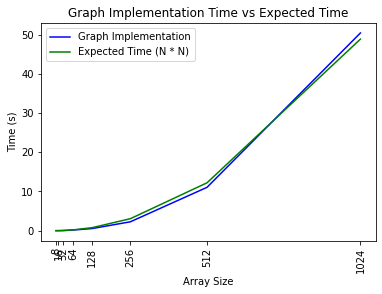

In [19]:

time_0 = time_rcm[0]/(8*8)
time_expected = [(size**2) * (time_0) for size in arr_sizes]

#plt.plot(arr_sizes, time_scipy, 'r-', label = "Scipy Implementation")
plt.plot(arr_sizes, time_rcm, 'b-', label = "Graph Implementation")
plt.plot(arr_sizes, time_expected, 'g-', label = "Expected Time (N * N)")


plt.ylabel('Time (s)')
plt.xlabel('Array Size')

plt.xticks(arr_sizes, rotation=90)

plt.title("Graph Implementation Time vs Expected Time")
plt.legend()
plt.show()

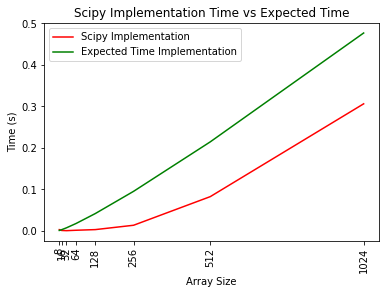

In [20]:
import numpy as np
time_0 = time_rcm[0]/(8*8)
time_expected = [(size) * np.log2(size) * (time_0) for size in arr_sizes]

plt.plot(arr_sizes, time_scipy, 'r-', label = "Scipy Implementation")
plt.plot(arr_sizes, time_expected, 'g-', label = "Expected Time Implementation")

plt.ylabel('Time (s)')
plt.xlabel('Array Size')

plt.xticks(arr_sizes, rotation=90)

plt.title("Scipy Implementation Time vs Expected Time")
plt.legend()
plt.show()

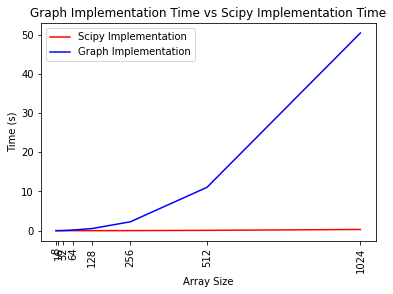

In [21]:

plt.plot(arr_sizes, time_scipy, 'r-', label = "Scipy Implementation")
plt.plot(arr_sizes, time_rcm, 'b-', label = "Graph Implementation")

plt.ylabel('Time (s)')
plt.xlabel('Array Size')

plt.xticks(arr_sizes, rotation=90)

plt.title("Graph Implementation Time vs Scipy Implementation Time")

plt.legend()
plt.show()

[7 8 9 3 5 1 0 4 6 2]


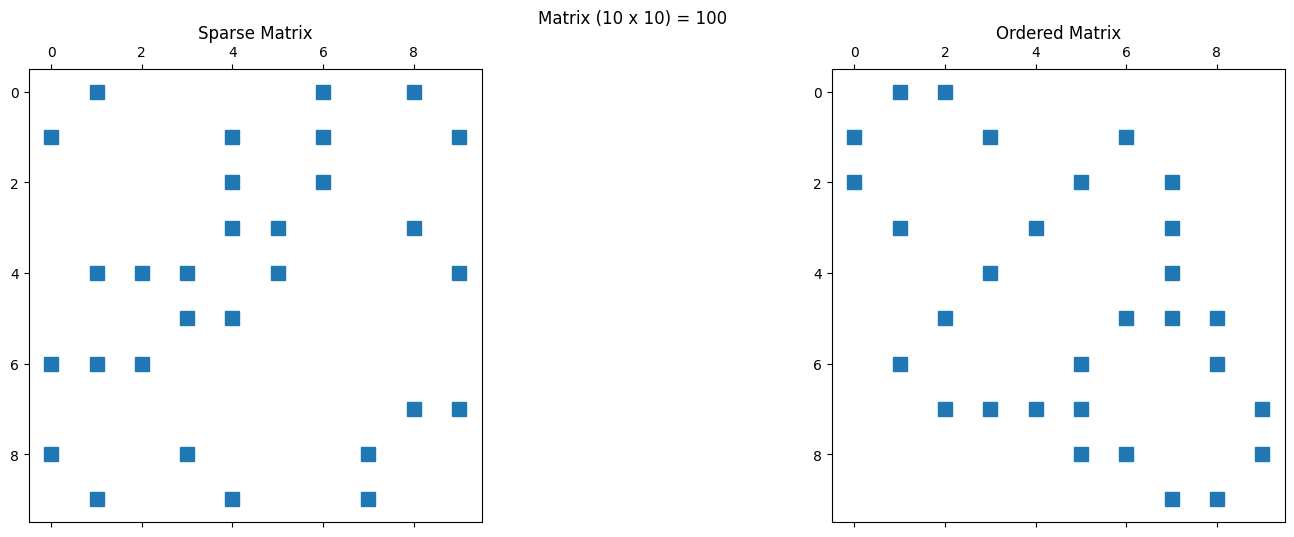

Levou: 0.5717487335205078
[7, 8, 9, 3, 5, 1, 0, 4, 6, 2]


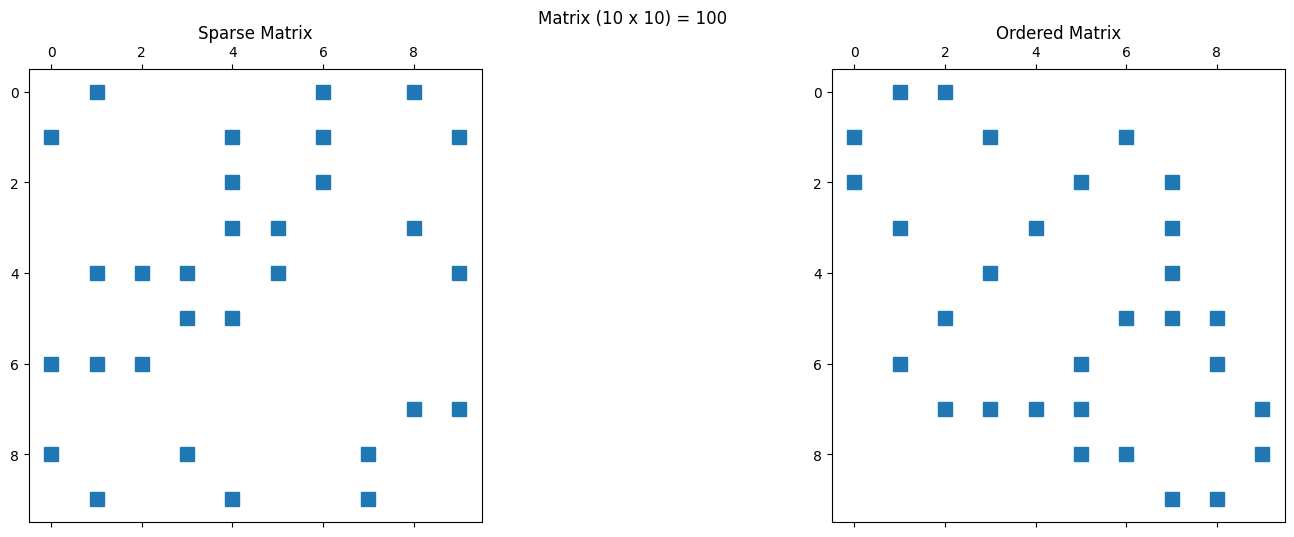

Levou: 0.5643870830535889


In [41]:
# Sample Execution
num_rows = 10
matrix = [[0.0] * num_rows for _ in range(num_rows)]

# This is the test graph,
# check out the above graph photo
matrix[0] = [0, 1, 0, 0, 0, 0, 1, 0, 1, 0]
matrix[1] = [1, 0, 0, 0, 1, 0, 1, 0, 0, 1]
matrix[2] = [0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
matrix[3] = [0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
matrix[4] = [0, 1, 1, 1, 0, 1, 0, 0, 0, 1]
matrix[5] = [0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
matrix[6] = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
matrix[7] = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
matrix[8] = [1, 0, 0, 1, 0, 0, 0, 1, 0, 0]
matrix[9] = [0, 1, 0, 0, 1, 0, 0, 1, 0, 0]

# Mandatory Parameters, Without Them Won't Run

A_l = np.asarray(matrix)
arr_size = num_rows
out_folder = './'

time_scipy_test = scipy_rcm(A_l, arr_size, './', True)
time_rcm_test = my_rcm(A_l, arr_size, './', True)


/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:116: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)


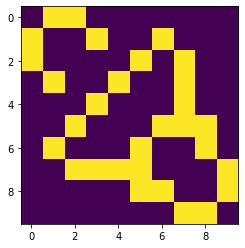

In [43]:
reorder = [7, 8, 9, 3, 5, 1, 0, 4, 6, 2]
graph = csr_matrix(A_l)

graph = rearrange_graph(graph, reorder)
graph = graph.toarray()

plt.imshow(graph)

#if save_path: plt.savefig(save_path)

plt.show()

In [48]:
print(graph)

[[0 1 1 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 1 0 0 0]
 [1 0 0 0 0 1 0 1 0 0]
 [0 1 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 1 1 1 0]
 [0 1 0 0 0 1 0 0 1 0]
 [0 0 1 1 1 1 0 0 0 1]
 [0 0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 1 1 0]]


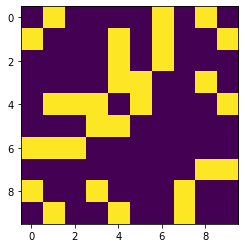

In [45]:
plt.imshow(A_l)
plt.show()